In [40]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-accidents/US_Accidents_March23.csv


#  EDA US accidents
1. Select a large real world data set from kaggle
2. Perform data prep & cleaning using Numpy & pandas
3. Preform EA & Viz using Matplotlib & seaborne
4. Ask & Answer questions using Jupyter
5. Summerize all inferences
6. Document & publish the note book


# Questions
* Acc more in warmer or colder climates
* Which 5 states has most accidents
* How about per capita income


## 1. Download Data

In [41]:
df = pd.read_csv('/kaggle/input/us-accidents/US_Accidents_March23.csv')

In [42]:
df.head(10)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day
5,A-6,Source2,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
6,A-7,Source2,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
7,A-8,Source2,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
8,A-9,Source2,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
9,A-10,Source2,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day


In [43]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [44]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [45]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)

In [46]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 13 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Severity           int64  
 1   Start_Lat          float64
 2   Start_Lng          float64
 3   End_Lat            float64
 4   End_Lng            float64
 5   Distance(mi)       float64
 6   Temperature(F)     float64
 7   Wind_Chill(F)      float64
 8   Humidity(%)        float64
 9   Pressure(in)       float64
 10  Visibility(mi)     float64
 11  Wind_Speed(mph)    float64
 12  Precipitation(in)  float64
dtypes: float64(12), int64(1)
memory usage: 766.5 MB


In [47]:
len(newdf.columns)

13

In [48]:
missing_percentage = df.isnull().sum().sort_values(ascending = False)/len(df)

<AxesSubplot:ylabel='Columns'>

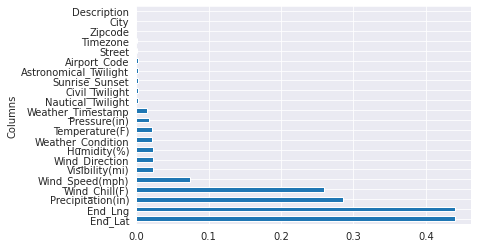

In [49]:
missing_percentage[missing_percentage != 0].plot(xlabel = 'Columns', ylabel = '% Values', kind = 'barh')

# Exploratory DA


In [50]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

## Things to consider
*  City
* Start Time
* Start long, Start Lat
* Temp
* Weather Condition


### City

In [51]:
df.City.unique()

array(['Dayton', 'Reynoldsburg', 'Williamsburg', ..., 'Ness City',
       'Clarksdale', 'American Fork-Pleasant Grove'], dtype=object)

In [52]:
cities_by_accidents = df.City.value_counts()
cities_by_accidents[:20]

Miami            186917
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
Orlando          109733
Austin            97359
Raleigh           86079
Nashville         72930
Baton Rouge       71588
Atlanta           68186
Sacramento        66264
San Diego         55504
Phoenix           53974
Minneapolis       51488
Richmond          48845
Oklahoma City     46092
Jacksonville      42447
Tucson            39304
Columbia          38178
Name: City, dtype: int64

<AxesSubplot:>

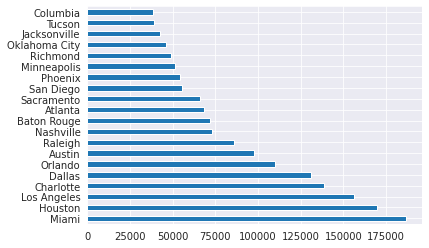

In [53]:
cities_by_accidents[:20].plot(kind = 'barh')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

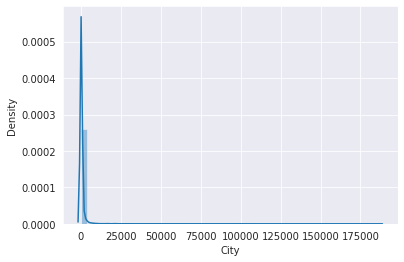

In [54]:
import seaborn as sns
sns.set_style('darkgrid')
sns.distplot(cities_by_accidents)

In [55]:
high_acc_cities = cities_by_accidents[cities_by_accidents >= 1000]
low_acc_cities = cities_by_accidents[cities_by_accidents<1000]

len(high_acc_cities)

1218

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

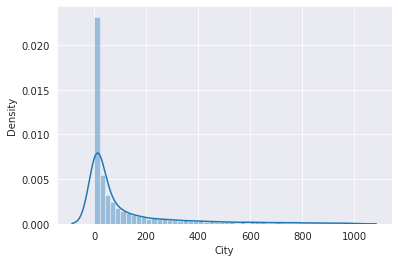

In [56]:
sns.distplot(low_acc_cities)

<AxesSubplot:xlabel='City', ylabel='Count'>

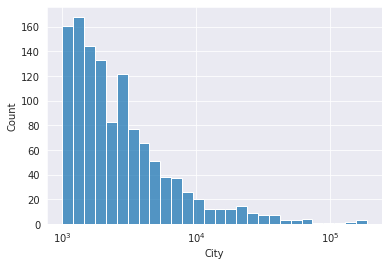

In [57]:
sns.histplot(high_acc_cities,log_scale = True)

### Start Time 

In [58]:
df.Start_Time[0]

'2016-02-08 05:46:00'

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

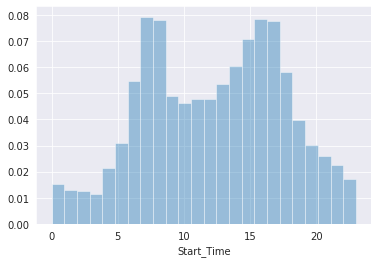

In [59]:
df.Start_Time = pd.to_datetime(df.Start_Time)
sns.distplot(df.Start_Time.dt.hour, bins =24, kde = False, norm_hist = True)

<AxesSubplot:xlabel='Start_Time'>

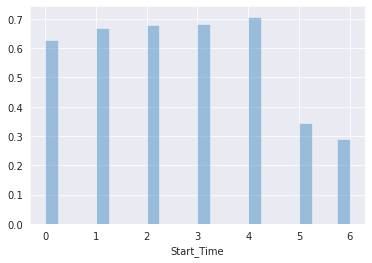

In [60]:
sns.distplot(df.Start_Time.dt.dayofweek, bins =24, kde = False, norm_hist = True)

## Is the distribution of accidents by hour the same on weekends as on the week days?


<AxesSubplot:xlabel='Start_Time'>

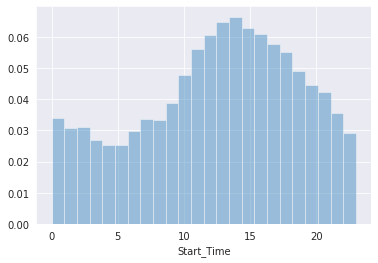

In [61]:
sundays_start_time  = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sundays_start_time.dt.hour, bins =24, kde = False, norm_hist = True)

<AxesSubplot:xlabel='Start_Time'>

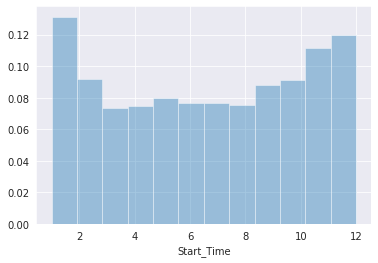

In [62]:
sns.distplot(sundays_start_time.dt.month, bins =12, kde = False, norm_hist = True)

The overall accident rates are pretty high in november & December


<AxesSubplot:xlabel='Start_Time'>

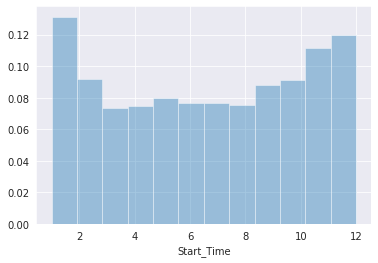

In [63]:
df_2019 = df[df.Start_Time.dt.year == 2016]
sns.distplot(sundays_start_time.dt.month, bins =12, kde = False, norm_hist = True)

# Summary & Insights

Insights :
* No data from NY
* Less than 5 % of the cities have more than 1000 yearly accidents
* The number of accidents per city decreases exponentially
* A high percentage of accidents occur in 3 pm to 7 pm 
* When is accidents/traffic is highest
* There is significantly less accidents in the weeked

## Start Latitude & Start Longitude 

In [64]:
df.Start_Lng

0          -84.058723
1          -82.831184
2          -84.032608
3          -84.205582
4          -84.188354
              ...    
7728389   -117.379360
7728390   -117.148060
7728391   -117.847790
7728392   -118.403020
7728393   -117.230920
Name: Start_Lng, Length: 7728394, dtype: float64

In [65]:
df.Start_Lat

0          39.865147
1          39.928059
2          39.063148
3          39.747753
4          39.627781
             ...    
7728389    34.002480
7728390    32.766960
7728391    33.775450
7728392    33.992460
7728393    34.133930
Name: Start_Lat, Length: 7728394, dtype: float64

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

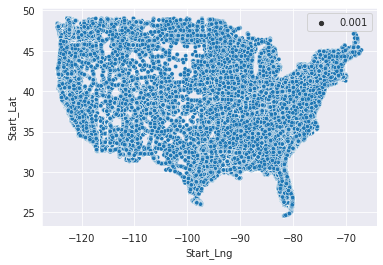

In [66]:
sns.scatterplot(x =df.Start_Lng, y=df.Start_Lat, size = 0.001 )

In [67]:
sample_df = df.sample(int(0.1 * len(df))) # Trail run 

In [68]:
import folium as fl
map = fl.Map()
map

In [69]:
lat, lon = df.Start_Lat[0], df.Start_Lng[0]
fl.Marker((lat, lon))

In [70]:
for x in df[['Start_Lat', 'Start_Lng']].sample(100).iteritems():
    print (x[1])

3417877    38.952882
6209542    29.729894
1348345    30.190384
2440709    44.948479
4334569    32.791144
             ...    
2697620    35.918674
401664     33.803249
4445867    35.712224
1207597    43.637871
589947     33.463085
Name: Start_Lat, Length: 100, dtype: float64
3417877    -94.529719
6209542    -95.457469
1348345    -97.770691
2440709    -92.934319
4334569    -96.600988
              ...    
2697620    -78.464752
401664    -117.902451
4445867    -78.842316
1207597    -95.708847
589947     -84.210327
Name: Start_Lng, Length: 100, dtype: float64


In [71]:
list(zip(list(df.Start_Lat), list(df.Start_Lng)))# Creating a Lat & Long list

[(39.865147, -84.058723),
 (39.92805900000001, -82.831184),
 (39.063148, -84.032608),
 (39.747753, -84.20558199999998),
 (39.627781, -84.188354),
 (40.10059, -82.92519399999998),
 (39.758274, -84.23050699999997),
 (39.770382, -84.194901),
 (39.778061, -84.172005),
 (40.10059, -82.92519399999998),
 (39.952812, -83.119293),
 (39.932709, -82.83091),
 (39.737633, -84.14993299999998),
 (39.79076, -84.241547),
 (39.972038, -82.913521),
 (39.745888, -84.17041),
 (39.748329, -84.224007),
 (39.752174, -84.239952),
 (39.740669, -84.184135),
 (39.790703, -84.244461),
 (40.052509, -82.88233199999998),
 (39.773346, -84.224686),
 (39.628288, -84.226151),
 (40.023487, -82.994888),
 (39.761379, -84.25921600000002),
 (40.158024, -82.641762),
 (39.733219, -84.159653),
 (39.775303, -84.200523),
 (39.789322, -84.23910500000002),
 (39.75872, -84.183762),
 (40.081459, -83.122398),
 (39.83321, -84.112946),
 (40.042725, -82.99730699999998),
 (39.974415, -82.848854),
 (39.994766, -83.02449),
 (40.006477, -83.0

In [ ]:
from folium.plugins import HeatMap
map = fl.Map()
HeatMap(list(zip(list(df.Start_Lat), list(df.Start_Lng)))).add_to(map)
map

## Ask & answer question
* Why dosent New York not in the acccidents cities
* Are there more accidents in warmer or colder areas?
* Which 5 states has the highest number of accidents
* Among the top 100 cities in number of accidents, which states do they belong
* what time of the day are accidents more frequent in
* Which Days of the week has the most accidents
* which months has the most accidents
* Explain the monthwise trend



# Summary & Insights

Insights :
* No data from NY
* Less than 5 % of the cities have more than 1000 yearly accidents
* The number of accidents per city decreases exponentially
* A high percentage of accidents occur in 3 pm to 7 pm 
* When is accidents/traffic is highest
* There is significantly less accidents in the weeked